In [151]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import csv




/tmp/ipykernel_5271/207342095.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [152]:
# ROAD Qualities dataset
# https://www.theglobaleconomy.com/rankings/roads_quality/Europe/
url = "https://www.theglobaleconomy.com/rankings/roads_quality/Europe/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [153]:
Countries = ["Countries"]
RoadQuality = ["RoadQuality"]
GlobalRank = ["Ranking"]
year = 2019

In [154]:
def changeToAndSymbol(text):
    new_text = text.replace("&amp;", "&")
    return new_text

def getCountry(text):
    start_str = "\">"
    end_str = "</a>"
    start_index = text.index(start_str) + len(start_str)
    end_index = text.index(end_str)
    result = text[start_index:end_index]
    result = changeToAndSymbol(result)
    #print(result)
    return result

In [155]:
country_data = soup.findAll('table', attrs = {'id': "benchmarkTable"})
soup = BeautifulSoup(str(country_data), "html.parser")

rows = soup.select('tr')

#print(rows[0])
data = []
for row in rows[1:]:
    test = str(row)
    soup2 = BeautifulSoup(test, "html.parser")
    td_tags = soup2.find_all('td')
    Countries.append(getCountry(str(td_tags[0])))
    RoadQuality.append(td_tags[1].get_text().strip())
    GlobalRank.append(td_tags[2].get_text().strip())
    #print(td_tags[0])
    #for th in th_tags:
     #   print(th.get_text().strip())

    #data.append(soup.select("th"))
#print(data[1])

 #   print(row)
#country_table = country_data.findAll("tr")
print(Countries)
print(RoadQuality)
print(GlobalRank)


['Countries', 'Netherlands', 'Switzerland', 'Austria', 'Portugal', 'Spain', 'Croatia', 'Denmark', 'Luxembourg', 'France', 'Finland', 'Germany', 'Sweden', 'Cyprus', 'Turkey', 'Slovenia', 'UK', 'Lithuania', 'Estonia', 'Greece', 'Norway', 'Belgium', 'Ireland', 'Italy', 'Poland', 'Iceland', 'Hungary', 'Slovakia', 'Albania', 'Czechia', 'Montenegro', 'Latvia', 'Russia', 'Serbia', 'Bulgaria', 'North Macedonia', 'Malta', 'Romania', 'Ukraine', 'Bosnia & Herz.', 'Moldova']
['RoadQuality', '6.4', '6.3', '6', '6', '5.7', '5.6', '5.6', '5.5', '5.4', '5.3', '5.3', '5.3', '5.1', '5', '4.9', '4.9', '4.8', '4.7', '4.6', '4.5', '4.4', '4.4', '4.4', '4.3', '4.1', '4', '4', '3.9', '3.9', '3.9', '3.6', '3.5', '3.5', '3.4', '3.4', '3.3', '3', '3', '2.8', '2.6']
['Ranking', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']


In [156]:
# Open a new CSV file for writing
with open('roadQuality2019.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the arrays as columns in the CSV file
    for row in zip(Countries, RoadQuality, GlobalRank):
        writer.writerow(row)

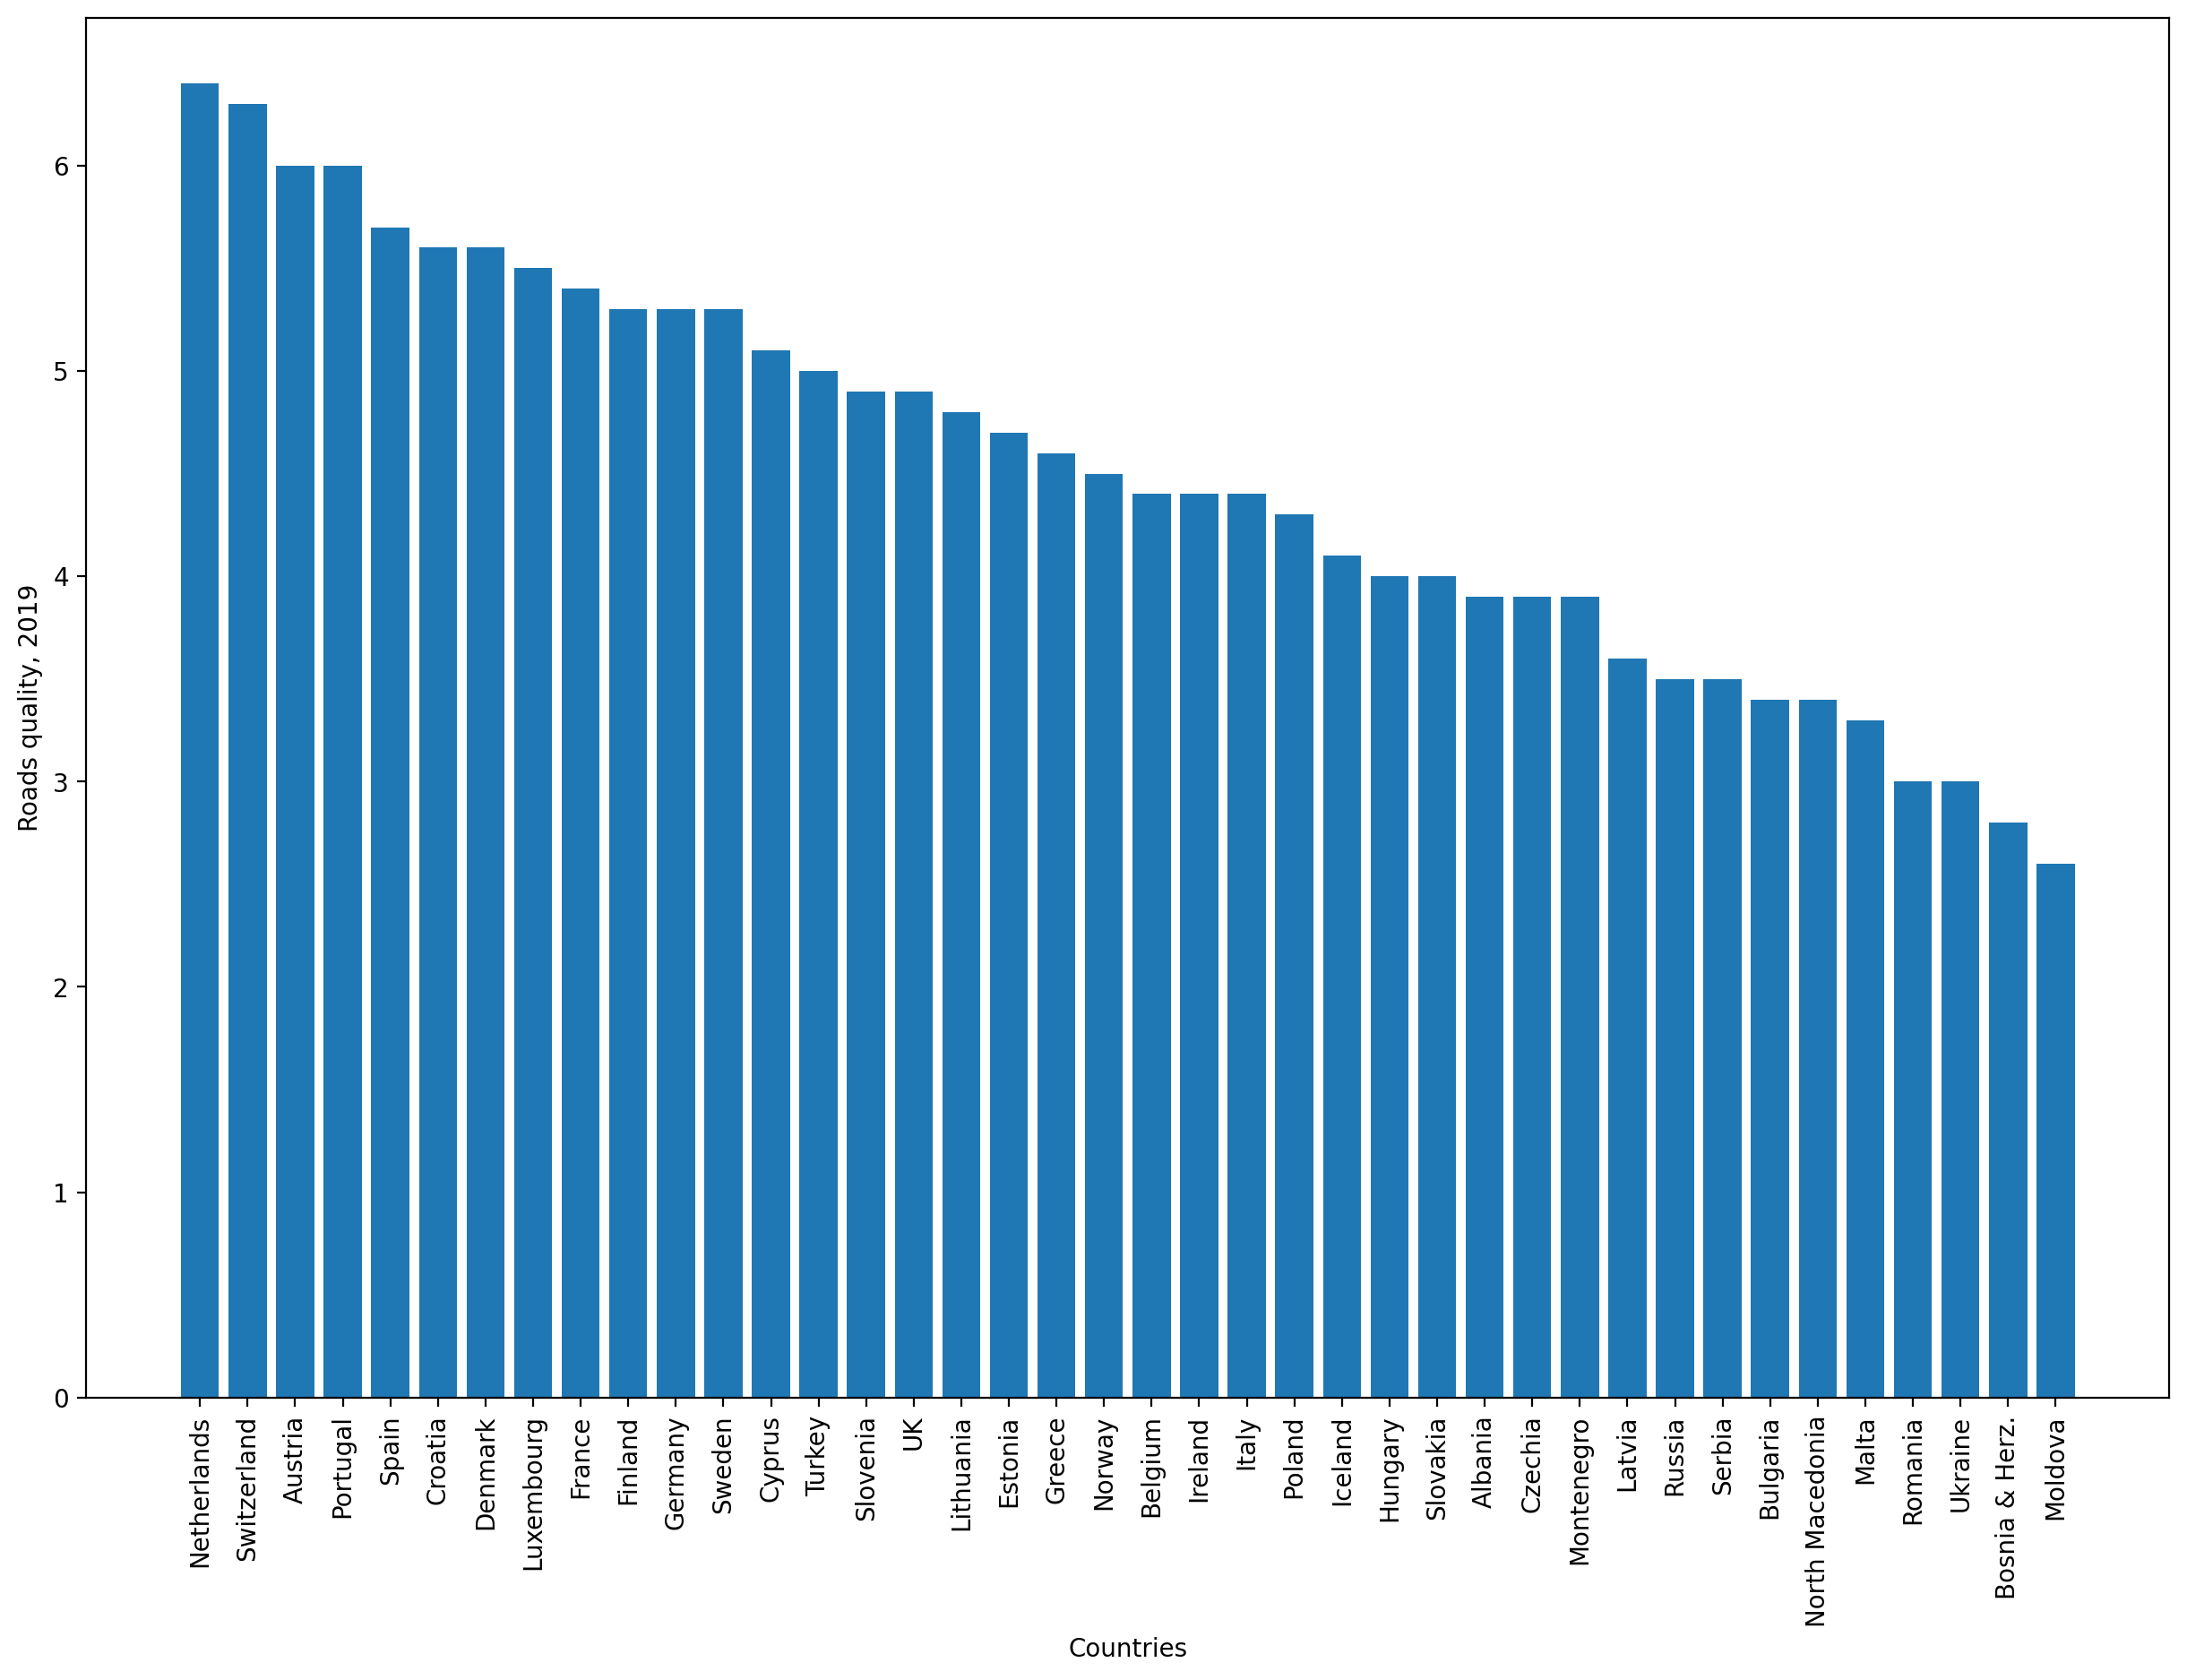

In [160]:
# Read CSV file using Pandas
df = pd.read_csv('roadQuality2019.csv')

# Extract data for plotting
x = df['Countries']
y = df['RoadQuality']



# Create bar chart using Matplotlib
plt.bar(x, y)
plt.rcParams['figure.figsize'] = [20, 15]
# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)


plt.xlabel('Countries')
plt.ylabel('Roads quality, 2019')
plt.show()